In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

matplotlib.style.use('ggplot')
pd.set_option("display.max_columns", None)

In [3]:
headers = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv')
headers

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID


In [4]:
fec = pd.read_csv('../itcont.txt.zip', sep="|", nrows=10, names=headers.columns)
fec.head(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00425645,N,M2,NaN,11930332238,15,IND,"MYERS, WALTER",TUSTIN RANCH,CA,92782,MICROSOFT,CONSULTANT,1192011,250,NaN,INCA210,713442,NaN,NaN,4030920111137082784
1,C00377051,N,M2,NaN,11930332597,15,IND,"ORROCK, MICHELLE",ELK GROVE,CA,95624,C & M INSURANCE,INSURANCE AGENT,1102011,350,NaN,INCA161,713448,NaN,NaN,4030920111137082785
2,C00377051,N,M2,NaN,11930332597,15,IND,"SCHACHTERLE, DIANE",CARMICHAEL,CA,95608,ACRI,DIRECTOR OF POLICY,1102011,300,NaN,INCA164,713448,NaN,NaN,4030920111137082786
3,C00487447,N,M2,NaN,11930332701,15,IND,"CLEVENGER, DON JEFFERY",SUNNYVALE,TX,75182,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,1312011,283,NaN,PR1611594225441,713467,NaN,P/R DEDUCTION ($283.33 SEMI-MONTHLY),4030920111137082792
4,C00487447,N,M2,NaN,11930332701,15,IND,"GREER, JAMES ALAN",ROANOKE,TX,76262,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,1312011,250,NaN,PR675291525441,713467,NaN,P/R DEDUCTION ($250.00 SEMI-MONTHLY),4030920111137082793


In [5]:
data_types = {header: str for header in headers}
data_types['TRANSACTION_AMT'] = float
data_types

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_TP': str,
 'TRANSACTION_PGI': str,
 'IMAGE_NUM': str,
 'TRANSACTION_TP': str,
 'ENTITY_TP': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'EMPLOYER': str,
 'OCCUPATION': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'OTHER_ID': str,
 'TRAN_ID': str,
 'FILE_NUM': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'SUB_ID': str}

In [6]:
fec = pd.read_csv('../itcont.txt.zip', sep='|', names=headers.columns, dtype=data_types)
fec.shape

(3372139, 21)

In [7]:
fec.sample(10)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
2802088,C00518282,A,12G,P,13942261861,15,IND,"HOOVER, HOWARD S. JR.",HOUSTON,TX,77057,RETIRED,RETIRED,10092012,250.0,NaN,SA11.3264877,894334,NaN,NaN,4110820131198677800
3283014,C00506022,A,12G,G,12021070179,15,IND,"LUKE, LAURENCE MARTIN",SCOTTSDALE,AZ,85258,RETIRED,RETIRED,10122012,500.0,NaN,SA0102120312507,843438,NaN,NaN,1101320170035897123
42747,C00110585,N,M2,NaN,11930457274,15,IND,"SHAPIRO, MARVIN S. ESQ.",LOS ANGELES,CA,90049,NaN,RETIRED,01162011,5000.0,NaN,SA11AI.6523,716453,NaN,NaN,4031720111137540091
1805202,C00496240,N,12G,G2012,12940426323,15,IND,"HOTCHKISS, LARRY J.",COLUMBUS,OH,43215,SELF EMPLOYED,ATTORNEY,10032012,250.0,NaN,C4428376,826042,NaN,NaN,4110720121170122531
1258834,C00487363,N,M6,NaN,12971374589,10,IND,"WISEMAN, DICK",AUSTIN,TX,78750,SELF-EMPLOYED,MEDICAL DOCTOR,05212012,250.0,NaN,SA11.6017,791840,NaN,NaN,4062220121157837655
2660860,C00431445,A,30G,G2012,13963850533,15,IND,"PERRY, KENNETH",ROCKVILLE,MD,20853,FANNIE MAE,ATTORNEY,10312012,250.0,NaN,C28855551,876050,NaN,NaN,4091520131196605124
2698736,C00494740,A,M7,P2012,13962735422,15,IND,"FREEMAN, MARY",CORDOVA,TN,38088,BAPTIST MEMORIAL HEALTH CARE,DIRECTOR,06152012,500.0,NaN,C16600355,873011,NaN,NaN,4060620131190854623
2447982,C00431445,A,M6,P2012,13943161808,15,IND,"AKERLOF, CARL",ANN ARBOR,MI,48104,UNIVERSITY OF MICHIGAN,PROFESSOR OF PHYSICS,05312012,200.0,NaN,C16200057,896893,NaN,NaN,4121220131201349166
224421,C00003251,A,M8,NaN,11932451577,15,IND,"WILLIAMS, DONNA",ANCHORAGE,AK,99508,ANCHORAGE SCHOOL DISTRICT,CLASSROOM TEACHER,07022011,200.0,NaN,A2011-2153193,745511,NaN,NaN,4092020111142991899
332537,C00147173,N,M10,NaN,11971728310,15,IND,"BURZYNSKI, JULIAN MR.",ELK GROVE VILLAGE,IL,60007,WIRTZ BEVERAGE ILLINOIS,GENERAL MANAGER,09302011,208.0,NaN,PR1578320426690,750167,NaN,P/R DEDUCTION ($0.00 ),4102720111144414165


In [8]:
cm_headers =  pd.read_csv('https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cm_header_file.csv')
cm_headers

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID


In [9]:
cm = pd.read_csv('../cm.txt', sep='|', names=cm_headers.columns)
print(cm.shape)
cm.head(5)

(14455, 15)


,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000042,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,"LYNCH, MICHAEL J. MR.",3600 WEST LAKE AVENUE,NaN,GLENVIEW,IL,60026.0,B,Q,NaN,Q,C,ILLINOIS TOOL WORKS INC.,NaN
1,C00000059,HALLMARK CARDS PAC,GREG SWARENS,2501 MCGEE,MD#288,KANSAS CITY,MO,64108.0,U,Q,UNK,M,C,NaN,NaN
2,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001.0,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
3,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107.0,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
4,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612.0,U,Q,UNK,Q,T,MEDICAL ASS'N; KANSAS [AMPAC],NaN


In [10]:
fecc = pd.merge(fec, cm[['CMTE_ID', 'CMTE_NM', 'CAND_ID']], on='CMTE_ID', how='inner')
print(fecc.shape)
fecc.head(5)

(3372139, 23)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID
0,C00425645,N,M2,NaN,11930332238,15,IND,"MYERS, WALTER",TUSTIN RANCH,CA,92782,MICROSOFT,CONSULTANT,01192011,250.0,NaN,INCA210,713442,NaN,NaN,4030920111137082784,"ATLAS PAC, FEDERAL",NaN
1,C00425645,A,M3,NaN,11930501656,15,IND,"LOWREY, LEE",NEWPORT BEACH,CA,92658,PACER COMMUNITIES,DIRECTOR OF FINANCE,02032011,500.0,NaN,PAYA212,717650,NaN,NaN,4031820111137613153,"ATLAS PAC, FEDERAL",NaN
2,C00425645,A,M3,NaN,11930501656,15,IND,"FEATHER, KATHRYN",GARDEN GROVE,CA,92840,COUNTY OF ORANGE,POLICY ADVISOR,02222011,250.0,NaN,INCA221,717650,NaN,NaN,4031820111137613154,"ATLAS PAC, FEDERAL",NaN
3,C00425645,A,M3,NaN,11930501656,15,IND,"TOBIN, KEVIN",COSTA MESA,CA,92626,UCI,ENGINEER,02222011,250.0,NaN,INCA219,717650,NaN,NaN,4031820111137613155,"ATLAS PAC, FEDERAL",NaN
4,C00425645,N,M5,NaN,11931295390,15,IND,"DREYER, MARY",DANA POINT,CA,92629,SANTA ANA USD,TEACHER,04272011,250.0,NaN,INCA248,727360,NaN,NaN,4050920111139806337,"ATLAS PAC, FEDERAL",NaN


In [12]:
cn_headers =  pd.read_csv('https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cn_header_file.csv')
cn_headers

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP


In [13]:
cn = pd.read_csv('../cn.txt', sep='|', names=cn_headers.columns)
cn.head(5)

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00089,"CRAWFORD, HARRY T JR",DEM,2010,AK,H,0.0,C,P,C00466698,4350 BUTTE CIR,NaN,ANCHORAGE,AK,99504.0
1,H0AK00097,"COX, JOHN ROBERT",REP,2012,AK,H,0.0,C,N,C00525261,PO BOX 1092,NaN,ANCHOR POINT,AK,995561092.0
2,H0AL00016,"BOZEMAN, MARTHA RENEE",UNK,2010,AL,H,7.0,O,C,C00464040,PO BOX 2512,NaN,BIRMINGHAM,AL,35201.0
3,H0AL01030,"GOUNARES, PETER HUNTER",REP,2012,AL,H,1.0,C,C,C00459495,PO BOX 1010,NaN,ORANGE BEACH,AL,36561.0
4,H0AL02087,"ROBY, MARTHA",REP,2012,AL,H,2.0,I,C,C00462143,3260 BANKHEAD AVENUE,NaN,MONTGOMERY,AL,36106.0


In [14]:
cn['CAND_NAME'].unique()

array(['CRAWFORD, HARRY T JR', 'COX, JOHN ROBERT',
       'BOZEMAN, MARTHA RENEE', ..., 'NEUMANN, MARK W',
       'FLETCHER, SHEIRL LEE', 'GOODENOUGH, KEITH B.'], dtype=object)

In [15]:
cn['CAND_NAME'].unique().shape

(5524,)

In [16]:
cn[cn['CAND_NAME'].str.contains('OBAMA')]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0


In [17]:
cn[cn['CAND_NAME'].str.contains('ROMNEY')]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4620,P80003353,"ROMNEY, MITT / RYAN, PAUL D.",REP,2012,US,P,0.0,C,C,C00431171,585 COMMERCIAL ST.,NaN,BOSTON,MA,2109.0


In [18]:
cn[cn['CAND_NAME'].isin(['OBAMA, BARACK', 'ROMNEY, MITT / RYAN, PAUL D.'])]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0


In [19]:
cn.loc[cn['CAND_NAME'].str.contains('ROMNEY'), 'CAND_NAME'].values

array(['ROMNEY, MITT / RYAN, PAUL D. '], dtype=object)

In [20]:
cn[cn['CAND_NAME'].isin(['OBAMA, BARACK', 'ROMNEY, MITT / RYAN, PAUL D. '])]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0
4620,P80003353,"ROMNEY, MITT / RYAN, PAUL D.",REP,2012,US,P,0.0,C,C,C00431171,585 COMMERCIAL ST.,NaN,BOSTON,MA,2109.0


In [21]:
cn.loc[cn['CAND_NAME'].str.contains('ROMNEY'), 'CAND_NAME'] = 'ROMNEY, MITT'
cn.loc[cn['CAND_NAME'].str.contains('ROMNEY')]['CAND_NAME'].values

array(['ROMNEY, MITT'], dtype=object)

In [22]:
cn_bomr = cn[cn['CAND_NAME'].isin(['OBAMA, BARACK', 'ROMNEY, MITT'])]
cn_bomr

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0
4620,P80003353,"ROMNEY, MITT",REP,2012,US,P,0.0,C,C,C00431171,585 COMMERCIAL ST.,NaN,BOSTON,MA,2109.0


In [23]:
last_fec = pd.merge(fecc, cn_bomr[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], on='CAND_ID', how='inner')
print(last_fec.shape)
last_fec.head(5)

(1059267, 25)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00431445,N,Q1,P2008,11930701008,22Y,IND,"PORTA, BONNIE",CAPE ELIZABETH,ME,04107,NaN,NaN,03092011,2300.0,NaN,SB28A-106502,724196,NaN,NaN,4041920111138175295,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
1,C00431445,N,Q1,G2008,11930701008,22Y,IND,"PORTA, BONNIE",CAPE ELIZABETH,ME,04107,NaN,NaN,03092011,2300.0,NaN,SB28A-106503,724196,NaN,NaN,4041920111138175296,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
2,C00431445,A,Q3,P2012,12970029343,15,IND,"ANTHONY, KENT",LEAGUE CITY,TX,77573,THE METHODIST HOSPITAL SYSTEM,PHYSICIAN,09302011,1000.0,NaN,C12462768,756218,NaN,NaN,4021620121151193386,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
3,C00431445,A,Q3,P2012,12970029344,15,IND,"KAHN, VIRGINIA",CAMBRIDGE,MA,02138,RETIRED,RETIRED,08082011,1000.0,NaN,C11861688,756218,NaN,NaN,4021620121151193391,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
4,C00431445,A,Q3,P2012,12970021794,15,IND,"ELSON, SALLY T",CHICAGO,IL,60657,NaN,INFORMATION REQUESTED,09202011,250.0,NaN,C12160885,756218,NaN,NaN,4021620121151170741,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM


In [24]:
last_fec['CAND_NAME'].value_counts()

OBAMA, BARACK    637617
ROMNEY, MITT     421650
Name: CAND_NAME, dtype: int64

In [25]:
(last_fec['TRANSACTION_AMT'] > 0).value_counts()

True     1052127
False       7140
Name: TRANSACTION_AMT, dtype: int64

In [26]:
last_fec = last_fec.loc[last_fec['TRANSACTION_AMT'] > 0]

In [27]:
last_fec['OCCUPATION'].value_counts()[:20]


RETIRED                  202024
ATTORNEY                  60801
PHYSICIAN                 38559
HOMEMAKER                 33144
PROFESSOR                 17480
CONSULTANT                17275
LAWYER                    15645
ENGINEER                  12000
PRESIDENT                 11941
INFORMATION REQUESTED     11825
EXECUTIVE                 10564
SELF-EMPLOYED              9889
NONE                       8499
MANAGER                    8392
TEACHER                    7651
OWNER                      7115
BUSINESS OWNER             6972
CEO                        6886
SALES                      6723
NOT EMPLOYED               6691
Name: OCCUPATION, dtype: int64

In [28]:
by_occupation = last_fec.pivot_table(index='OCCUPATION', 
                                    columns='CAND_PTY_AFFILIATION',
                                    values='TRANSACTION_AMT',
                                    aggfunc='sum')
by_occupation

CAND_PTY_AFFILIATION,DEM,REP
OCCUPATION,,
SOFTWARE ENGINEER/HOMEMAKER,2225.0,NaN
$2500 ALREADY CONTRIBUTED,NaN,5000.0
(FORMER) COMPUTER TECH MANAGEMENT,500.0,NaN
(FORMER) COMPUTER TECH. MANAGEMENT,1500.0,NaN
(SEMI) RETIRED TEACHER,NaN,250.0
...,...,...
ZUMBA GOLD INSTRUCTOR,NaN,250.0
ZUMBA INSTRUCTOR,NaN,2500.0
\RESEARCH DIRECTOR,250.0,NaN


In [29]:
by_occupation['SUM'] = by_occupation.sum(axis=1)
by_occupation

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
SOFTWARE ENGINEER/HOMEMAKER,2225.0,NaN,2225.0
$2500 ALREADY CONTRIBUTED,NaN,5000.0,5000.0
(FORMER) COMPUTER TECH MANAGEMENT,500.0,NaN,500.0
(FORMER) COMPUTER TECH. MANAGEMENT,1500.0,NaN,1500.0
(SEMI) RETIRED TEACHER,NaN,250.0,250.0
...,...,...,...
ZUMBA GOLD INSTRUCTOR,NaN,250.0,250.0
ZUMBA INSTRUCTOR,NaN,2500.0,2500.0
\RESEARCH DIRECTOR,250.0,NaN,250.0


In [30]:
over_10mm = by_occupation.loc[by_occupation['SUM'] > 10**7]
over_10mm

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
ATTORNEY,49616201.0,21791814.0,71408015.0
C.E.O.,13500.0,16649148.0,16662648.0
CEO,12693212.0,5913438.0,18606650.0
CHAIRMAN,3828164.0,9652011.0,13480175.0
CONSULTANT,10707939.0,6985307.0,17693246.0
EXECUTIVE,8329918.0,20468201.0,28798119.0
HOMEMAKER,23831339.0,60956038.0,84787377.0
INFORMATION REQUESTED,10231903.0,NaN,10231903.0
INVESTOR,6038114.0,13428109.0,19466223.0


In [31]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'C.E.O.': 'CEO',
    'C.E.O': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x) 
last_fec.loc[:, 'OCCUPATION'] = last_fec.loc[:, 'OCCUPATION'].map(f)

In [32]:
by_occupation = last_fec.pivot_table(index='OCCUPATION', 
                                columns='CAND_PTY_AFFILIATION',
                                values='TRANSACTION_AMT',
                                aggfunc='sum')
by_occupation['SUM'] = by_occupation.sum(axis=1)
over_10mm = by_occupation.loc[by_occupation['SUM'] >= 10**7] 
over_10mm

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
ATTORNEY,49616201.0,21791814.0,71408015.0
CEO,12717712.0,25054094.0,37771806.0
CHAIRMAN,3828164.0,9652011.0,13480175.0
CONSULTANT,10707939.0,6985307.0,17693246.0
EXECUTIVE,8329918.0,20468201.0,28798119.0
HOMEMAKER,23831339.0,60956038.0,84787377.0
INVESTOR,6038114.0,13428109.0,19466223.0
LAWYER,14198143.0,2482767.0,16680910.0
NOT PROVIDED,10231903.0,1701689.0,11933592.0


In [33]:
over_10mm.sort_values(by='SUM', ascending=False)

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
RETIRED,85212969.0,91770280.0,176983249.0
HOMEMAKER,23831339.0,60956038.0,84787377.0
ATTORNEY,49616201.0,21791814.0,71408015.0
CEO,12717712.0,25054094.0,37771806.0
PRESIDENT,10428104.0,19177075.0,29605179.0
EXECUTIVE,8329918.0,20468201.0,28798119.0
PHYSICIAN,14918921.0,13030969.0,27949890.0
INVESTOR,6038114.0,13428109.0,19466223.0
CONSULTANT,10707939.0,6985307.0,17693246.0


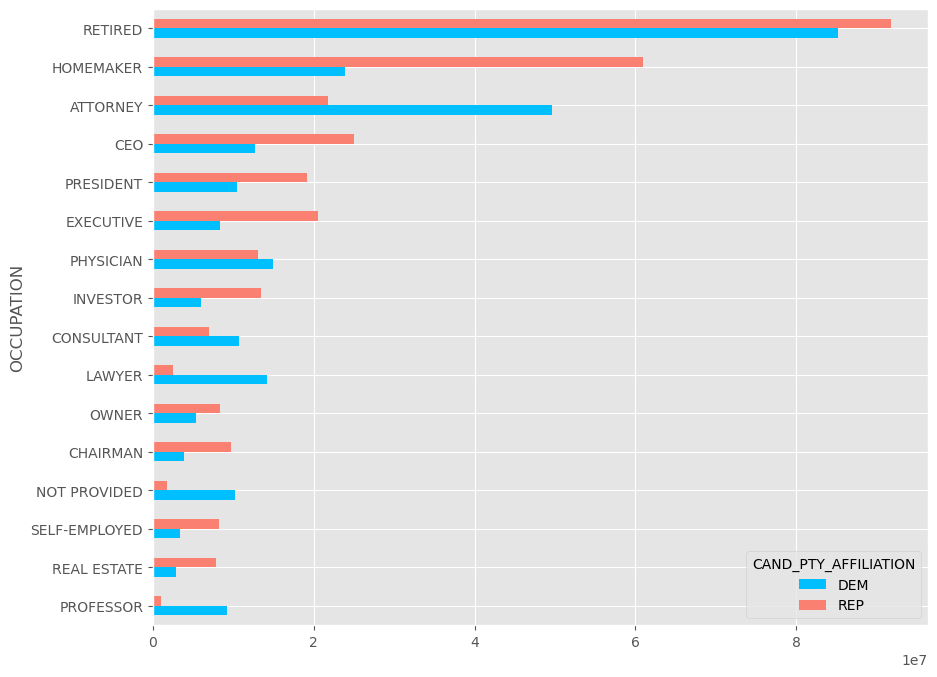

In [39]:
_ = over_10mm.sort_values(by='SUM', ascending=True)[['DEM', 'REP']].\
    plot(kind='barh', color=('deepskyblue', 'salmon'), figsize=(10, 8))

In [40]:
over_10mm_pct = over_10mm[['DEM', 'REP']].div(over_10mm['SUM'], axis=0)
over_10mm_pct

CAND_PTY_AFFILIATION,DEM,REP
OCCUPATION,,
ATTORNEY,0.694827,0.305173
CEO,0.336699,0.663301
CHAIRMAN,0.283985,0.716015
CONSULTANT,0.605199,0.394801
EXECUTIVE,0.289252,0.710748
HOMEMAKER,0.281072,0.718928
INVESTOR,0.310184,0.689816
LAWYER,0.851161,0.148839
NOT PROVIDED,0.857403,0.142597


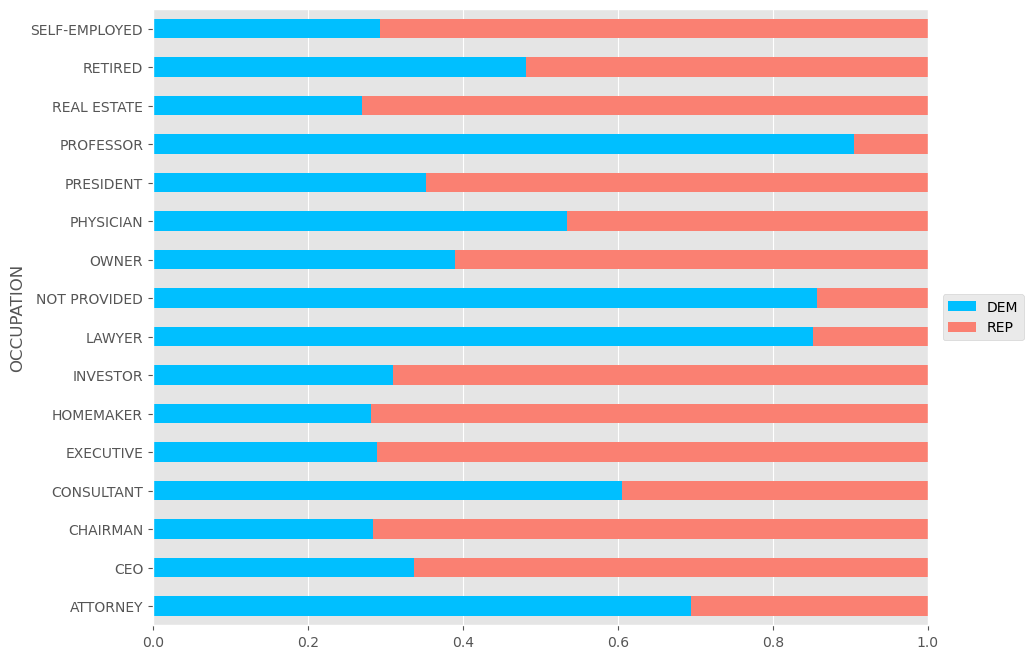

In [41]:
_ = over_10mm_pct.plot(kind='barh', color=('deepskyblue', 'salmon'), stacked=True, figsize=(10, 8))
plt.xlim((0, 1))
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

In [45]:
last_fec.groupby('CAND_NAME').sum()

,TRANSACTION_AMT
CAND_NAME,
"OBAMA, BARACK",562711400.0
"ROMNEY, MITT",659176427.0
